In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import glob
import cv2
import json
import numpy as np

plt.rcParams['figure.figsize'] = 15, 8

In [2]:
IMG_PATH = '../../Osintgram/output/covidartmuseum_*.jpg'

GOOGLE_JSON_PATH = '../google/output/objects/'

In [3]:
IMG_PATH = glob.glob(IMG_PATH)

In [4]:
IMG_PATH

['../../Osintgram/output/covidartmuseum_2473568429358760633_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2460616626308661396_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2347496194261481504_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2378027764005286014_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2321842689945852442_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2272832180690799187_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2534418764213727574_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2326239333797684761_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2367602285020492939_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2516893959279174268_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2465609965621769959_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2313339295347783437_31985798421.jpg',
 '../../Osintgram/output/covidartmuseum_2303314927358423122_3198

In [5]:
import os

In [6]:
def open_json_and_img(image_path):
    base_name = os.path.basename(image_path)
    with open(GOOGLE_JSON_PATH + base_name + '.json') as f:
        google_data = json.loads(f.read())
        
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return google_data, img

In [7]:
def draw_bounding_boxes(img, json_data):
    response = json_data['responses'][0]
    
    for annotations in response['localizedObjectAnnotations']:
        contour = (np.array(
            [
                (coords['x'], coords['y']) 
                 for coords 
                 in annotations['boundingPoly']['normalizedVertices']
            ]
        )) * img.shape[:2][::-1]
        name = annotations['name']

        topleft = contour.min(axis=0).astype(int)
        bottomright = contour.max(axis=0).astype(int)
        
        img = cv2.rectangle(img, (topleft[0], topleft[1]), (bottomright[0], bottomright[1]), (0,255,0), 3)
        imt = cv2.putText(img, name, (topleft[0],topleft[1] + 30),0,1.5,(50,120,50), 5)
        
    return img

In [10]:
IMG_PATH[1]

'../../Osintgram/output/covidartmuseum_2460616626308661396_31985798421.jpg'

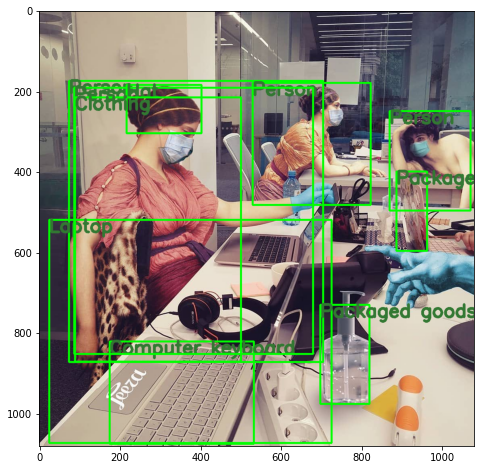

In [16]:
json_data, img = open_json_and_img(IMG_PATH[12])

plt.imshow(draw_bounding_boxes(img, json_data))